# Surfingcrypto `Portfolio`

The `surfingcrypto` portfolio.

In [92]:
%load_ext autoreload
%autoreload 2
from surfingcrypto import Config
from surfingcrypto.portfolio import Portfolio
from surfingcrypto.portfolio.tracker import Tracker

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
c = Config("/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")



In [94]:
p = Portfolio("coinbase", configuration=c)



Warning! There are 5 transactionsthat were EXCLUDED in std_df.
Coinbase errors:
TransactionsHistory(Transactions:186 - Processed:186, Unhandled:0 - Errors:9)


In [95]:
p.std_df.head(10)


,type,amount,symbol,native_amount,nat_symbol,total,subtotal,total_fee,spot_price,trade_id
datetime,,,,,,,,,,
2018-10-22T06:29:22Z,buy,0.017237,BTC,100.00,EUR,100.00,97.01,2.99,5627.999719,None
2018-10-22T06:29:22Z,buy,100.000000,EUR,100.00,EUR,NaN,NaN,NaN,1.000000,None
2018-11-09T12:05:12Z,sell,0.017237,BTC,93.27,EUR,93.27,96.26,2.99,5584.488743,None
2018-11-09T12:05:13Z,sell,93.270000,EUR,93.27,EUR,NaN,NaN,NaN,1.000000,None
2018-11-09T12:06:14Z,buy,348.021666,BAT,93.27,EUR,93.27,90.28,2.99,0.259409,None
2018-11-09T12:06:15Z,buy,93.270000,EUR,93.27,EUR,NaN,NaN,NaN,1.000000,None
2019-01-25T14:28:56Z,sell,35.960000,EUR,35.96,EUR,NaN,NaN,NaN,1.000000,None
2019-01-25T14:28:56Z,sell,348.021666,BAT,35.96,EUR,35.96,37.95,1.99,0.109045,None
2021-04-20T18:57:40Z,buy,0.258429,ETH,500.00,EUR,500.00,492.66,7.34,1906.364408,None


In [96]:
p.std_df.total_fee.sum()


234.18000000000026

## Portfolio total investment`
Gets total investment buy summing up `fiat_deposit` and `fiat_withdrawal` investment.

<div class="alert alert-info">

Note

At the moment, when buying with a credit card, the transaction is not registered as `fiat_deposit` and so it is not included in this calculation.

</div>

In [97]:
p.coinbase.history.df[
    p.coinbase.history.df.type.isin(["fiat_deposit", "fiat_withdrawal"])
].groupby("type")[["amount"]].sum()



,amount
type,
fiat_deposit,1050.00
fiat_withdrawal,-35.96


## Portfolio live value tracker

In [98]:
t = Tracker(p.std_df, stocks_start="1-1-2021", configuration=c)



In [99]:
t.stocks_start


Timestamp('2021-01-01 00:00:00+0000', tz='UTC')

In [100]:
t.portfolio_df.head()


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share
0,2018-10-22 06:29:22+00:00,buy,0.017237,BTC,100.00,5627.999719
2,2018-11-09 12:05:12+00:00,sell,0.017237,BTC,93.27,5584.488743
4,2018-11-09 12:06:14+00:00,buy,348.021666,BAT,93.27,0.259409
7,2019-01-25 14:28:56+00:00,sell,348.021666,BAT,35.96,0.109045
8,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408


### Load closedata log

Error log from loading data.

In [101]:
t.error_log


[]

### Set benchmark

Set coin as benchmark.

In [102]:
benchmark = t.set_benchmark("ETH")
benchmark


,Date,Close
0,2021-01-01 00:00:00+00:00,600.859522
1,2021-01-02 00:00:00+00:00,638.265609
2,2021-01-03 00:00:00+00:00,796.329350
3,2021-01-04 00:00:00+00:00,848.990363
4,2021-01-05 00:00:00+00:00,894.422659
...,...,...
432,2022-03-09 00:00:00+00:00,2465.147372
433,2022-03-10 00:00:00+00:00,2368.094996
434,2022-03-11 00:00:00+00:00,2345.209878
435,2022-03-12 00:00:00+00:00,2359.128839


#### Portfolio start balance

Tracker module allows to consider transactions happened before the `stocks_start` date specified.

This is done adjusting past positions to the current value at `stocks_start` date.

In [103]:
t.active_positions.head()


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share
8,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408
10,2021-04-22 10:13:53+00:00,buy,0.062128,MKR,250.00,3964.873854
13,2021-04-22 19:20:15+00:00,sell,0.062128,MKR,213.69,3491.496921
14,2021-04-24 08:53:47+00:00,buy,210.343863,ADA,213.69,1.000980
16,2021-04-25 16:15:33+00:00,buy,0.350116,CGLD,1.65,4.712730


#### Daily snapshots

The module produces daily snapshots of the portfolio balance.

In [104]:
t.daily_snapshots[-1]


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Date Snapshot
160,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,2022-03-13 00:00:00+00:00
162,2021-09-07 10:00:18+00:00,buy,72.073991,ADA,389.49,2.166873,2022-03-13 00:00:00+00:00
164,2021-09-09 23:30:55+00:00,buy,323.271703,ADA,692.45,2.142006,2022-03-13 00:00:00+00:00
156,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,2022-03-13 00:00:00+00:00
166,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,2022-03-13 00:00:00+00:00
170,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,2022-03-13 00:00:00+00:00
172,2021-12-23 07:28:57+00:00,buy,1.001178,AAVE,195.57,195.339958,2022-03-13 00:00:00+00:00


### Portfolio calculations

In [106]:
combined_df = t.per_day_portfolio_calcs(benchmark,)
combined_df.head()


,Adj cost,Adj cost per share,Date Snapshot,Open date,Qty,Symbol,Type,index_x,Symbol Adj Close,Adj cost daily,...,Benchmark Start Date Cost,Benchmark Return,symbol Return,symbol Share Value,Benchmark Share Value,Stock Gain / (Loss),Benchmark Gain / (Loss),Abs Value Compare,Abs Value Return,Abs. Return Compare
0,492.66,1906.364408,2021-04-20 00:00:00+00:00,2021-04-20 18:57:40+00:00,0.258429,ETH,buy,109,1936.596366,500.472817,...,492.66,2.223043,0.015858,500.472817,1587.864602,7.812817,1095.204602,7.812817,0.015858,-2.207185
1,492.66,1906.364408,2021-04-21 00:00:00+00:00,2021-04-20 18:57:40+00:00,0.258429,ETH,buy,110,1964.593249,507.708026,...,492.66,2.269638,0.030544,507.708026,1610.819957,15.048026,1118.159957,15.048026,0.030544,-2.239094
2,492.66,1906.364408,2021-04-22 00:00:00+00:00,2021-04-20 18:57:40+00:00,0.258429,ETH,buy,111,2000.536891,516.996908,...,492.66,2.329459,0.049399,516.996908,1640.291064,24.336908,1147.631064,24.336908,0.049399,-2.280060
3,492.66,1906.364408,2021-04-23 00:00:00+00:00,2021-04-20 18:57:40+00:00,0.258429,ETH,buy,112,1953.619811,504.872170,...,492.66,2.251375,0.024788,504.872170,1601.822557,12.212170,1109.162557,12.212170,0.024788,-2.226587
4,492.66,1906.364408,2021-04-24 00:00:00+00:00,2021-04-20 18:57:40+00:00,0.258429,ETH,buy,113,1828.220570,472.465360,...,492.66,2.042676,-0.040991,472.465360,1499.004530,-20.194640,1006.344530,-20.194640,-0.040991,-2.083667


In [153]:
import matplotlib.pyplot as plt


#### Adj cost daily

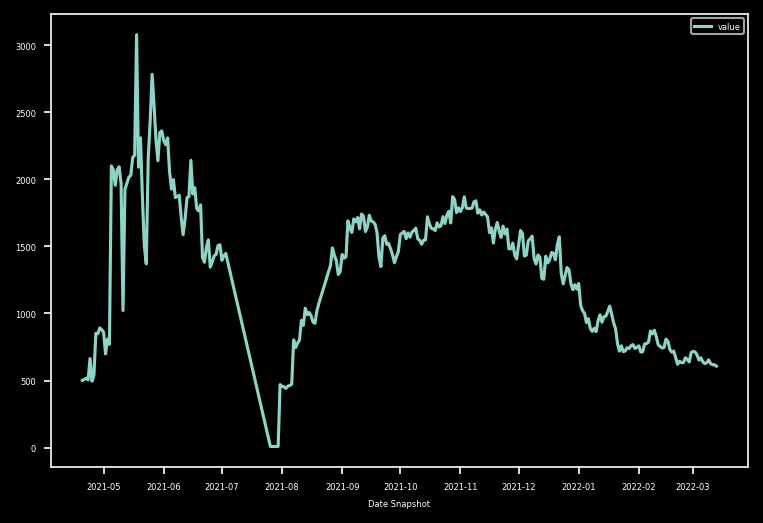

In [172]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(combined_df,
    ["Adj cost daily"]
    ).plot(
        x="Date Snapshot", ax=ax
        )



#### Adj cost daily by symbol

???

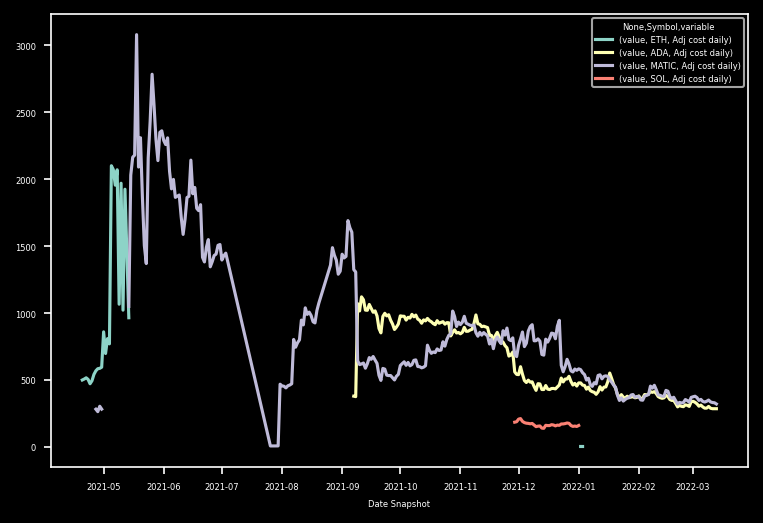

In [171]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(
    combined_df,
    ["Adj cost daily"],
    by="Symbol"
    ).set_index(
        ["Date Snapshot", "Symbol", "variable"]
    ).unstack(
        [ "Symbol", "variable"]
    ).plot(ax=ax)

### Plotting multiple variables

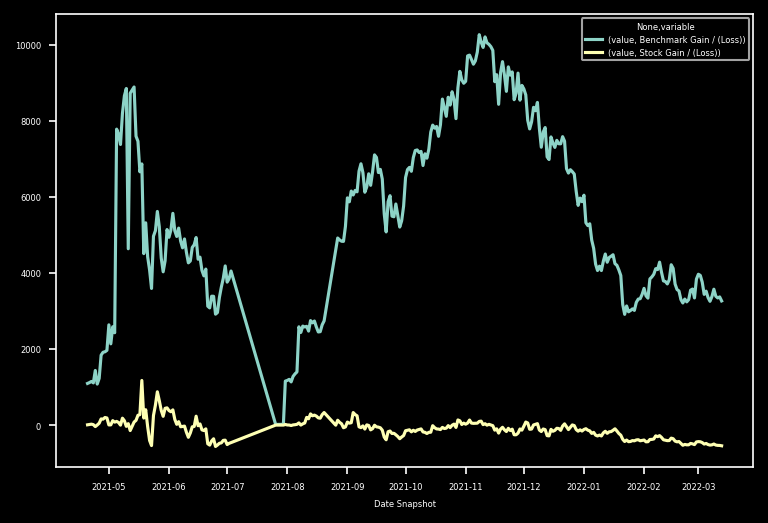

In [184]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(
    combined_df, ["Stock Gain / (Loss)", "Benchmark Gain / (Loss)"]
    ).set_index(
    ["Date Snapshot", "variable"]
    ).unstack(
        ["variable"]
    ).plot(ax=ax)



### Plotting multiple variables by symbol

In [191]:
grouped=t.daily_grouped_metrics(
    combined_df,
    ["Adj cost daily", "Benchmark Gain / (Loss)"],
    by="Symbol"
    ).set_index(
        ["Date Snapshot", "Symbol","variable",]
    ).unstack(
        [ "Symbol", "variable"]
    )
grouped


value                                               \
Symbol                   ETH            ADA          MATIC            SOL   
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily   
Date Snapshot                                                               
2021-04-20        500.472817            NaN            NaN            NaN   
2021-04-21        507.708026            NaN            NaN            NaN   
2021-04-22        516.996908            NaN            NaN            NaN   
2021-04-23        504.872170            NaN            NaN            NaN   
2021-04-24        472.465360     191.502341            NaN            NaN   
...                      ...            ...            ...            ...   
2022-03-09               NaN     303.213878     350.839253            NaN   
2022-03-10               NaN     289.444691     336.927749            NaN   
2022-03-11               NaN     286.212631     332.269139            NaN   
2022-03-12               NaN     286.411535     330.610869            NaN   
2022-03-13               NaN     286.063582     321.441119            NaN   

                                                               \
Symbol                            ETH                     ADA   
variable      Benchmark Gain / (Loss) Benchmark Gain / (Loss)   
Date Snapshot                                                   
2021-04-20                1095.204602                     NaN   
2021-04-21                1118.159957                     NaN   
2021-04-22                1147.631064                     NaN   
2021-04-23                1109.162557                     NaN   
2021-04-24                1006.344530              430.085334   
...                               ...                     ...   
2022-03-09                        NaN             2633.030716   
2022-03-10                        NaN             2495.958596   
2022-03-11                        NaN             2463.636753   
2022-03-12                        NaN             2483.295227   
2022-03-13                        NaN             2405.794021   

                                                               
Symbol                          MATIC                     SOL  
variable      Benchmark Gain / (Loss) Benchmark Gain / (Loss)  
Date Snapshot                                                  
2021-04-20                        NaN                     NaN  
2021-04-21                        NaN                     NaN  
2021-04-22                        NaN                     NaN  
2021-04-23                        NaN                     NaN  
2021-04-24                        NaN                     NaN  
...                               ...                     ...  
2022-03-09                 939.286817                     NaN  
2022-03-10                 890.388779                     NaN  
2022-03-11                 878.858537                     NaN  
2022-03-12                 885.871348                     NaN  
2022-03-13                 858.224173                     NaN  

[300 rows x 8 columns]

In [205]:
uniqs=grouped.columns.get_level_values(1).unique()
uniqs

Index(['ETH', 'ADA', 'MATIC', 'SOL'], dtype='object', name='Symbol')

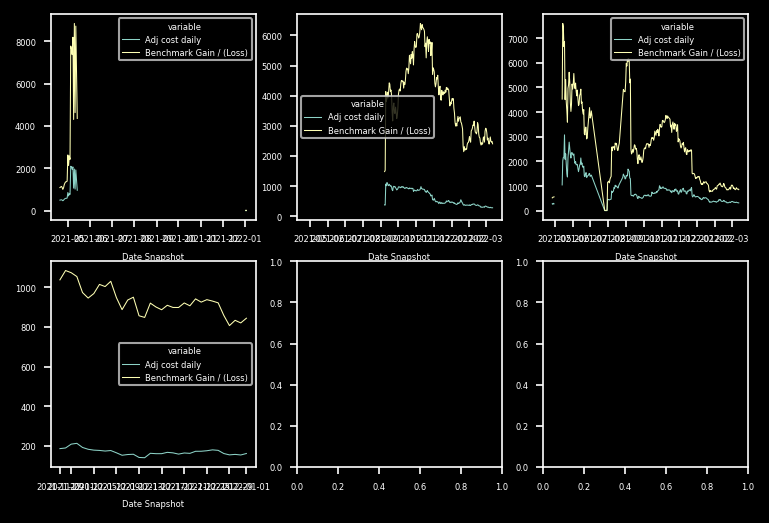

In [220]:
import math
f,axes=plt.subplots(ncols=3,nrows=math.ceil(len(uniqs)/3),dpi=150)
for uniq,ax in zip(uniqs,axes.flatten()):
    grouped[("value",uniq)].plot(ax=ax,linewidth=0.5)


#### Calplot

see investment throughout time.

In [239]:
t.daily_grouped_metrics(combined_df,["Adj cost daily"]).set_index("Date Snapshot")[["value"]]

,value
Date Snapshot,
2021-04-20,500.472817
2021-04-21,507.708026
2021-04-22,516.996908
2021-04-23,504.872170
2021-04-24,663.967701
...,...
2022-03-09,654.053131
2022-03-10,626.372440
2022-03-11,618.481770


In [242]:
# import calplot
# from surfingcrypto.reporting.plotting import shiftedColorMap
# import matplotlib.cm as cm
# from matplotlib.colors import Normalize, LinearSegmentedColormap
# value=t.daily_grouped_metrics(combined_df,["Adj cost daily"]).set_index("Date Snapshot")[["value"]]
# norm = Normalize(vmin=value["value"].min(), vmax=value["value"].max())
# cmap = shiftedColorMap(
#     LinearSegmentedColormap.from_list(
#         "colorbar",
#         [
#             "darkred",
#             "red",
#             "orange",
#             "grey",
#             "lightgreen",
#             "green",
#             "darkgreen",
#         ],
#     ),
#     midpoint=norm(
#         p.coinbase.history.df[
#             p.coinbase.history.df.type.isin(
#                 ["fiat_deposit", "fiat_withdrawal"]
#             )
#         ]
#         .groupby("type")[["amount"]]
#         .sum()
#         .reset_index()["amount"]
#         .sum()
#     ),
# )
# c = calplot.calplot(
#     value,
#     cmap=cmap
#     )

